# CH 1 建立量子體系，需要何種數學？

**如果用 colab 就先執行下面這兩格**，本機不用執行

In [ ]:
%%capture
!pip install ipympl

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

## 1-1 三角函數

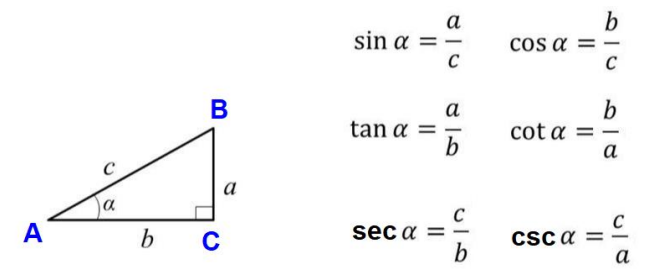
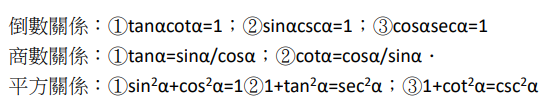
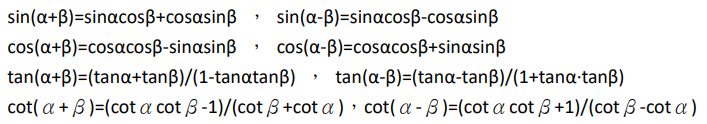

In [ ]:
# write an example of sin cos tan cot sec csc value of 30 degree
import math
angle = 30
angle = math.radians(angle)
print("sin(30) = ", math.sin(angle))
print("cos(30) = ", math.cos(angle))
print("tan(30) = ", math.tan(angle))
print("cot(30) = ", 1/math.tan(angle))
print("sec(30) = ", 1/math.cos(angle))
print("csc(30) = ", 1/math.sin(angle))

## 1-2 微積分

### 1-2-1 微分

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def derivative_approx(f, x, d=1e-5):
    """
    微分的估計
    """
    return (f(x) - f(x - d)) / d

def plot_function_and_tangent(f, a, d=1e-5):
    """
    畫出f還有他在x=a的切線
    
    Parameters:
    - f: 輸入的函數
    - a: 要畫出切線的點
    - d: 很小的數
    """
    x = np.linspace(a - 2, a + 2, 400)
    y = f(x)
    
    f_a = f(a)
    slope = derivative_approx(f, a, d)
    
    tangent_y = f_a + slope * (x - a)
    
    plt.plot(x, y, label=f'Function: f(x)', color='blue')
    
    plt.plot(x, tangent_y, label=f'Tangent at x = {a}', color='red', linestyle='--')
    
    plt.scatter([a], [f_a], color='black')
    plt.text(a, f_a, f'({a:.2f}, {f_a:.2f})', fontsize=12, verticalalignment='bottom')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and its Tangent Line')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()

f = lambda x: x ** 2  # 可改成要畫的函數

a = np.pi / 4  # 要畫出切線的點
plot_function_and_tangent(f, a)

### 1-2-2 偏微分

##### 導入sympy庫的一些常用功能和相關模組。
- Matrix：用於創建和操作矩陣的類別。
- symbols：用於創建符號變量的函數。
- diff：用於計算符號表達式的微分。
- sin 和 cos：用於計算正弦和餘弦的函數。
- pprint：用於漂亮地打印數學表達式的函數。
- init_printing：用於設置打印數學表達式的輸出格式。
- exp：用於計算指數函數的函數。
- linsolve：用於求解線性方程組的函數。
- plot3d_parametric_line：用於繪製3D參數化線的函數。
- CoordSys3D：用於定義3D坐標系的類別。
- gradient：用於計算梯度的函數。
- divergence：用於計算散度的函數。
- Del：用於表示向量微分運算符的類別。
- curl：用於計算旋度的函數。
- display：用於在Jupyter Notebook中顯示結果的函數。
\
最後使用init_printing可以找到最好輸出數學式的格式

In [ ]:
from sympy import Matrix, symbols, diff, sin, cos, pprint, init_printing, exp  # sympy常用功能
from sympy.solvers.solveset import linsolve  # 線性方程組求解功能
from sympy.plotting import plot3d_parametric_line  # 的3D參數線繪製
from sympy.vector import CoordSys3D, gradient, divergence, Del, curl  # 3D向量計算功能
from IPython.display import display

init_printing()  # 找到最好的輸出格式

#### 梯度計算

什麼是梯度呢?  
梯度可以把他想成向量指向比較高的地方。  
現在有個函數$f(x,y)$  
$$f\left(x,y\right)=xe^{-\left(x^2+y^2\right)}$$  
使用sympy，跟numpy和matplotlib結合。

##### 使用 sympy 庫的 CoordSys3D、exp、display 和 Del 函數來計算和顯示梯度
1. 首先，使用CoordSys3D函數建立一個3D坐標系，命名為R。
2. 定義一個函數f，其中包含R.x和R.y的指數衰減。
3. 使用display函數輸出函數f。
4. 設置一個空的二維陣列P，大小為R4B x R4B。
5. 使用np.mgrid函數生成X4B和Y4B網格，範圍為-3到3之間，等分為R4B個點。
6. 使用np.ndenumerate函數迭代X4B網格，對每個點計算函數f的值並存儲到P中的對應位置。
7. 使用plt.imshow函數將陣列P以熱圖的形式繪製出來，並使用plt.colorbar添加色度條。
8. 使用Del函數創建一個del運算符，表示梯度的向量。
9. 使用delop.gradient函數計算函數f的梯度，並將結果存儲在變數g中。
10. 使用display函數輸出梯度向量g。
11. 設置一個空的二維陣列X4QV和Y4QV，用於存儲箭頭的終點坐標。
12. 使用np.ndenumerate函數迭代X4Q網格，對每個起點計算梯度向量g的值，並將結果存儲到X4QV和Y4QV中的對應位置。
13. 使用plt.quiver函數繪製箭頭，以起點和終點坐標作為參數。
14. 使用plt.show函數顯示繪製完成的圖形。

In [ ]:
# 什麼是梯度, Del() 的使用

R = CoordSys3D("R")  # 建立實數平面

f = R.x * exp(-(R.x ** 2 + R.y ** 2))  # 定義f(x, y)
display(f)  # 輸出f

R4B = 70  # 每行要計算幾個
P = np.zeros((R4B, R4B))  # 建立70x70畫布

X4B, Y4B = np.mgrid[-3:3:R4B * 1j, -3:3:R4B * 1j]  # 在-3~3之間平分R4B個
for i, v in np.ndenumerate(X4B):
    now = f.subs({R.x: v, R.y: Y4B[i]})  # x, y 代入
    P[i[1], i[0]] = now  # 畫上去

plt.clf()  # 清空plt
extent=[-3, 3, -3, 3]  # 設定邊界
plt.imshow(P, extent=extent, cmap="magma")  # 畫到給使用者看的地方
plt.colorbar()  # 色度條
plt.show()  # 給使用者看

delop = Del()  # del operator, 相當於∇
g = delop.gradient(f, doit=True)  # 梯度
display(g)  # 輸出g

R4Q = 50  # 每行要計算幾個
X4Q, Y4Q = np.mgrid[-3:3:R4Q * 1j, -3:3:R4Q * 1j]  # 計算所有起點
# 以起點計算終點
X4QV, Y4QV = np.copy(X4Q), np.copy(Y4Q)
for i, v in np.ndenumerate(X4Q):
    now = g.subs({R.x: v, R.y: Y4Q[i]})  # x, y 代入
    now = now.to_matrix(R)  # 將向量函數轉換為矩陣
    X4QV[i], Y4QV[i], _ = now  # 將終點放上去

plt.quiver(X4Q, Y4Q, X4QV, Y4QV, color="lime",
           angles="xy", scale_units="xy", scale=3)  # 畫出箭頭

plt.show()  # 給使用者看

#### 散度計算

梯度有兩個好朋友，散度和旋度。他們都屬於向量微積分的範疇。  
什麼是散度呢？  
在一向量場中，聚焦於一點上，將所有的向量流入量與流出量相減，就是那一點的通量。而能計算出此向量場每點通量的函式就是那個向量場的散度。散度輸入是向量函數，輸出是純量。  
數學上常常這樣表示：    
$$\nabla\cdot V(x,y)=\frac{\partial V_x(x,y)}{\partial x}+\frac{\partial V_y(x,y)}{\partial y}$$

##### 使用∇⋅f的方法計算散度
1. 首先，使用CoordSys3D函數建立一個名為R的三維座標系。
2. 定義函數f，其中包含R.x和R.y的正弦和餘弦組合。
3. 使用display函數將函數f漂亮地打印出來。
4. 設定要計算點的解析度R4Q，並使用np.mgrid函數生成X4Q和Y4Q網格，範圍為-2到2之間，等分為R4Q個點。
5. 使用np.ndenumerate函數迭代X4Q網格，對每個點帶入函數f，並將結果轉換為矩陣表示，將終點坐標存儲在X4QV和Y4QV中。
6. 清空plt並使用plt.quiver函數繪製箭頭圖，以起點和終點坐標作為參數。
7. 使用plt.show函數顯示繪製完成的箭頭圖。
\
\
接下來，計算函數的散度：
8. 使用Del類別創建一個Del運算符。

9. 使用dot方法計算函數f的散度，將結果存儲在變數d中。
10. 使用display函數漂亮地打印散度d。
\
\
最後，視覺化散度的結果：
11. 設定要計算點的解析度R4B，並使用np.mgrid函數生成X4B和Y4B網格，範圍為-2到2之間，等分為R4B個點。

12. 創建一個空的二維陣列img，大小為R4B x R4B。
13. 使用np.ndenumerate函數迭代X4B網格，對每個點帶入散度d的表達式，並將結果存儲在img中的對應位置。
14. 使用plt.imshow函數以熱圖的形式繪製img，並使用plt.colorbar添加色度條。
15. 使用plt.show函數顯示繪製完成的熱圖。

In [ ]:
# 什麼是散度
# 散度是∇ ⋅ f


R = CoordSys3D("R")  # 建立實數平面
f = 1 * sin(R.x) * R.i + 1 * cos(R.y) * R.j  # 定義f(x, y)
display(f)  # 輸出f

R4Q = 30  # 要每行計算幾個點(解析度)
X4Q, Y4Q = np.mgrid[-2:2:R4Q * 1j, -2:2:R4Q * 1j]  # 計算所有起點
# 以起點帶入f得終點
X4QV, Y4QV = np.copy(X4Q), np.copy(Y4Q)
for i, v in np.ndenumerate(X4Q):
    now = f.subs({R.x: v, R.y: Y4Q[i]}) \
        .to_matrix(R)  # x, y代入並將向量函數轉換為矩陣
    X4QV[i], Y4QV[i], _ = now  # 結果放進去

plt.clf()  # 清空plt
plt.quiver(X4Q, Y4Q, X4QV, Y4QV,
           angles="xy", scale_units="xy", scale=3)  # 畫出箭頭
plt.show()

delop = Del()
d = delop.dot(f, doit=True)  # 散度
display(d)  # 輸出d

R4B = 50  # 要每行計算幾個點(解析度)
X4B, Y4B = np.mgrid[-2:2:R4B * 1j, -2:2:R4B * 1j]  # 計算需要計算的點
img = np.zeros((R4B, R4B))  # 建立畫布
extent = [-2, 2, -2, 2]  # 設定邊界
for i, v in np.ndenumerate(X4B):
    now = d.subs({R.x: v, R.y: Y4B[i]})  # x, y 代入
    img[i] = now  # 結果放進去
plt.imshow(img, extent=extent)  # 將img放到plt
plt.colorbar()  # 色度條

plt.show()

#### 旋度計算

在一向量場中，某一點的旋轉的量，就是旋度的大小。  
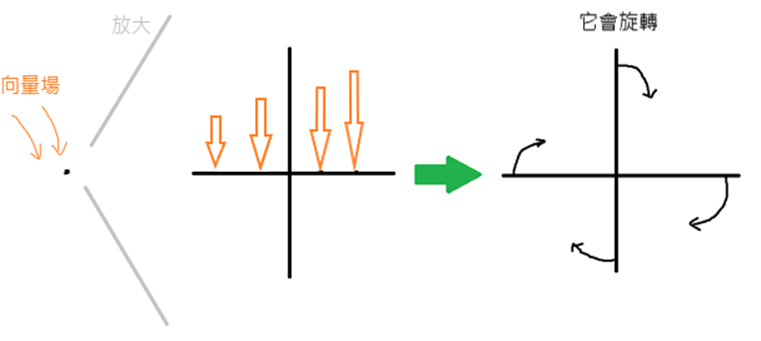  
而旋度的方向，可以用安培右手定則判斷。  
數學上可以這樣表示。  
$$\nabla\times A=\left(\frac{\partial A_z}{\partial y}-\frac{\partial A_z}{\partial z}\right)\hat{i}+\left(\frac{\partial A_x}{\partial z}-\frac{\partial A_x}{\partial x}\right)\hat{j}+\left(\frac{\partial A_y}{\partial x}-\frac{\partial A_x}{\partial y}\right)\hat{k}$$

##### 計算和視覺化向量場的旋度
1. 使用plt.clf()清空plt，準備進行繪圖。
2. 設定繪圖相關細節，包括建立一個3D圖形軸(ax)、定義實數空間R以及設定x、y、z軸的邊界。
3. 定義向量函數f，其中包含R.x和R.y的線性組合，作為原始的向量場。
4. 使用np.mgrid函數計算向量場的起點坐標X4B、Y4B和Z4B。
5. 使用np.ndenumerate函數迭代起點坐標，對每個點帶入向量函數f，並計算出對應的終點坐標，存儲在X4BV、Y4BV和Z4BV中。
6. 使用ax.quiver函數繪製原始的向量場，以起點和終點坐標作為參數。
7. 使用plt.show()函數顯示繪製完成的原始向量場。
\
\
接下來，計算並視覺化向量場的旋度：
8. 使用delop.cross方法計算向量場f的旋度，將結果存儲在變數c中。
9. 使用np.mgrid函數計算旋度向量場的起點坐標X4Q、Y4Q和Z4Q。
10. 使用np.ndenumerate函數迭代起點坐標，對每個點帶入旋度向量場c的表達式，並計算出對應的終點坐標，存儲在X4QV、Y4QV和Z4QV中。
11. 清空plt並使用ax.quiver函數繪製旋度向量場，以起點和終點坐標作為參數。
12. 使用plt.show()函數顯示繪製完成的旋度向量場。
13. 最後，使用display函數漂亮地打印旋度向量場的表達式c。

In [ ]:
# 什麼是旋度
# 旋度是∇ × f
plt.clf()  # 清空plt
# 設定畫布相關細節
ax = plt.axes(projection="3d")  # 畫3d圖
R = CoordSys3D("R")  # 建立實數空間
f = R.y * R.i - R.x * R.j  # 定義f為向量函數
ax.set_xlim((-2, 2))  # 設定x的邊界
ax.set_ylim((-2, 2))  # 設定y的邊界
ax.set_zlim((-2, 2))  # 設定z的邊界

# 原始向量場
X4B, Y4B, Z4B = np.mgrid[-2:2:6j, -2:2:6j, -2:2:6j]  # 計算向量場的向量起點
# 以起點算出向量終點
X4BV, Y4BV, Z4BV = np.copy(X4B), np.copy(Y4B), np.copy(Z4B)
for i, v in np.ndenumerate(X4B):
    now = f.subs({R.x: v, R.y: Y4B[i], R.z: Z4B[i]}).to_matrix(R)[:3]  # 將每一點代入f
    X4BV[i], Y4BV[i], Z4BV[i] = now  # 將結果丟進去畫布裡
ax.quiver(X4B, Y4B, Z4B, X4BV, Y4BV, Z4BV, length=0.2, color="red")  # 畫出原向量場
plt.show()  # 給使用者看

# 旋度向量場
delop = Del()
c = delop.cross(f, doit=True)  # 計算f的旋度
X4Q, Y4Q, Z4Q = np.mgrid[-2:2:6j, -2:2:6j, -2:2:6j]  # 計算旋度的向量起點
# 以起點算出向量終點
X4QV, Y4QV, Z4QV = np.copy(X4Q), np.copy(Y4Q), np.copy(Z4Q)
for i, v in np.ndenumerate(X4Q):
    # 將每一點代入c
    now = c.subs({R.x: v, R.y: Y4Q[i], R.z: Z4Q[i]}).to_matrix(R)[:3]
    X4QV[i], Y4QV[i], Z4QV[i] = now  # 將結果丟進去畫布裡

ax.quiver(X4Q, Y4Q, Z4Q, X4QV, Y4QV, Z4QV, length=0.2, color="cyan")  # 畫出旋度的向量
plt.show()  # 給使用者看
display(c)

## 1-3 複數

### 1. 複數的基本算術

In [ ]:
# 定義複數
z1 = 2 + 3j
z2 = 4 - 2j

# 加法
addition = z1 + z2  # (2 + 4) + (3 - 2)j = 6 + 1j

# 減法
subtraction = z1 - z2  # (2 - 4) + (3 + 2)j = -2 + 5j

# 乘法
multiplication = z1 * z2  # (2*4 - 3*(-2)) + (2*(-2) + 3*4)j = 14 + 8j

# 除法
division = z1 / z2  # ((2*4 + 3*(-2)) / (4^2 + (-2)^2)) + ((3*4 - 2*(-2)) / (4^2 + (-2)^2))j = 0.1 + 0.8j

print(f"加法: {addition}")
print(f"減法: {subtraction}")
print(f"乘法: {multiplication}")
print(f"除法: {division}")


### 2. 複數的共軛與絕對值

In [ ]:
# 複數
z = 3 + 4j

# 共軛
conjugate = z.conjugate()  # 3 - 4j

# 絕對值（模）
absolute_value = abs(z)  # √(3^2 + 4^2) = 5.0

print(f"共軛: {conjugate}")
print(f"絕對值: {absolute_value}")

### 3. 極坐標與轉換

Python 提供 `cmath` 模組來處理極坐標形式的複數。

In [ ]:
import cmath

# 複數
z = 4 + 2j

# 轉換為極坐標 (r, theta)
r, theta = cmath.polar(z)

# 轉換回直角坐標形式
z_rectangular = cmath.rect(r, theta)

print(f"極坐標: (r={r}, theta={theta})")
print(f"從極坐標轉換回的直角坐標形式: {z_rectangular}")

### 5. 複數的三角函數

In [ ]:
import cmath

# 複數
z = 1 + 2j

# 正弦
sine = cmath.sin(z)  # sin(1 + 2j)

# 餘弦
cosine = cmath.cos(z)  # cos(1 + 2j)

# 正切
tangent = cmath.tan(z)  # tan(1 + 2j)

print(f"正弦: {sine}")
print(f"餘弦: {cosine}")
print(f"正切: {tangent}")

### 6. 複數的根

要計算複數的 n 次根，可以使用德莫弗定理（De Moivre's theorem）。

In [ ]:
import cmath

# 複數
z = 1 + 1j

# n次根
n = 3
roots = [z**(1/n) * cmath.exp(2j * cmath.pi * k / n) for k in range(n)]

print(f"{z} 的三次根: {roots}")

## 1-5 矩陣

$$A=(a_1,a_2,a_3)$$
$$B=(b_1,b_2,b_3)$$
內積：
$$A\cdot B=a_1b_1+a_2b_2+a_3b_3$$
外積：
$$A \times B =
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k} \\
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
\end{vmatrix}
= (a_2b_3 - a_3b_2)\hat{i} + (a_3b_1 - a_1b_3)\hat{j} + (a_1b_2 - a_2b_1)\hat{k}$$

現在已經可以人工計算出內積與外積，接下來將介紹如何使用Python自動化，並視覺化圖形。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

##### 理解和視覺化向量的點積和向量積的概念
1. 首先，清除當前的圖形並創建一個3D坐標軸。
2. 設定3D坐標軸的長寬高比為1:1:1，以確保繪製出來的箭頭在坐標軸中呈現正確的比例。
3. 定義兩個向量a和b，並使用numpy庫的cross函數計算它們的向量積。
4. 使用numpy庫的dot函數計算向量a和向量b的點積，並將結果輸出。
5. 設定坐標軸的範圍，使得箭頭能夠在合適的範圍內展示。
6. 使用matplotlib庫的quiver函數在坐標軸上繪製三個箭頭：一個紅色箭頭表示向量a，一個藍色箭頭表示向量b，一個黑色箭頭表示向量積crossed。
7. 顯示繪製完成的圖形。

In [ ]:
# cross and dot
plt.clf()  # 清除當前圖形
ax = plt.axes(projection="3d")  # 創建一個3D坐標軸
ax.set_box_aspect(aspect=(1, 1, 1))  # 設定3D坐標軸的長寬高比為1:1:1
a = np.array([3, -5, 1])  # 定義向量a
b = np.array([1, 4, 0])  # 定義向量b
crossed = np.cross(a, b)  # 計算向量a和向量b的向量積

print("a dot   b is", np.dot(a, b))  # 輸出向量a和向量b的點積
print("a cross b is", crossed)  # 輸出向量a和向量b的向量積

size = 10  # 定義坐標軸的範圍
ax.set_xlim3d(-size, size)  # 設定x軸範圍
ax.set_ylim3d(-size, size)  # 設定y軸範圍
ax.set_zlim3d(-size, size)  # 設定z軸範圍

ax.quiver(0, 0, 0, *a, color="r")  # 繪製以原點為起點、向量a為箭頭的紅色箭頭
ax.quiver(0, 0, 0, *b, color="b")  # 繪製以原點為起點、向量b為箭頭的藍色箭頭
ax.quiver(0, 0, 0, *crossed, color="black")  # 繪製以原點為起點、向量積crossed為箭頭的黑色箭頭

plt.show()  # 顯示圖形

可以清楚的觀察到外積出來的結果會垂直於原本兩個向量a, b所形成的平面。

##### 陣列之間的元素相加、相減和內積運算
1. 首先，清除當前的圖形。
2. 定義兩個2維陣列a和b。
3. 使用+運算符將陣列a和陣列b的對應元素相加，並將結果存儲在變數summ中。
4. 使用-運算符將陣列a和陣列b的對應元素相減，並將結果存儲在變數sub中。
5. 使用np.matmul函數計算陣列a和陣列b的內積，並將結果存儲在變數mul中。
6. 輸出summ、sub和mul的結果。
7. 設定x軸和y軸的範圍。
8. 使用plt.quiver函數繪製箭頭，以原點為起點，向量a、向量b、向量summ和向量sub作為箭頭。
9. 顯示繪製完成的圖形。

In [ ]:
# summation of 2 2-dimension arrays
plt.clf()  # 清除當前圖形
a = np.array([1, 2])  # 定義一個2維陣列a
b = np.array([-2, 3])  # 定義一個2維陣列b
summ = a + b  # 計算a和b的元素相加
sub = a - b  # 計算a和b的元素相減
mul = np.array(np.matmul(a, b))  # 計算a和b的內積

print(f"a + b = {summ}")  # 輸出a和b的元素相加結果
print(f"a - b = {sub}")  # 輸出a和b的元素相減結果
print(f"a * b = {mul}")  # 輸出a和b的內積結果

plt.xlim(-6, 6)  # 設定x軸範圍
plt.ylim(-6, 6)  # 設定y軸範圍

plt.quiver(0, 0, *a, color="black", angles="xy", scale_units="xy", scale=1)  # 繪製以原點為起點、向量a為箭頭的黑色箭頭
plt.quiver(0, 0, *b, color="black", angles="xy", scale_units="xy", scale=1)  # 繪製以原點為起點、向量b為箭頭的黑色箭頭

plt.quiver(0, 0, *summ, color="blue", angles="xy", scale_units="xy", scale=1)  # 繪製以原點為起點、向量summ為箭頭的藍色箭頭
plt.quiver(0, 0, *sub, color="red", angles="xy", scale_units="xy", scale=1)  # 繪製以原點為起點、向量sub為箭頭的紅色箭頭

plt.show()  # 顯示圖形